In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:

def print_history(history, i, eval_model):  
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Graficación de la pérdida durante el entrenamiento y la validación
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(loss, label=f'Training Loss - Configuration {i}')
    plt.plot(val_loss, label=f'Validation Loss - Configuration {i}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss -\nBetter Loss {eval_model[0]}')
    plt.legend()

    # Graficación de la precisión durante el entrenamiento y la validación
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label=f'Training Accuracy - Configuration {i}')
    plt.plot(val_accuracy, label=f'Validation Accuracy - Configuration {i}')
    plt.axhline(y=eval_model[1], color='r', linestyle='--', label=f'Test Accuracy - Configuration {i}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy\nBest Accuracy {eval_model[1]}')
    plt.legend()

    plt.subplots_adjust(wspace=0.5)  # Ajusta el espacio entre los subplots horizontalmente
    plt.tight_layout()
    plt.show()


In [3]:
datam1 = pd.read_csv("data_m1.csv")
datam2 = pd.read_csv("Data_train_categoric_as_num.csv")
datam3 = pd.read_csv("Data_train_normalize.csv")

In [4]:
display(datam1)
display(datam2)
display(datam3)

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,3G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Media,Masculino,3-06,0
1,3G,No,Escuela,Si,Privado,11-15,Smartphone,Compra Megas,Media,Femenino,1-03,1
2,3G,Si,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,1-03,0
3,3G,Si,Escuela,Si,Privado,11-15,Smartphone,Compra Megas,Media,Masculino,1-03,1
4,4G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Buena,Masculino,1-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...
959,3G,No,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Media,Masculino,1-03,1
960,3G,No,Escuela,Si,Privado,11-15,Smartphone,Compra Megas,Media,Femenino,1-03,1
961,4G,No,Universidad,Si,Público,21-25,Smartphone,Compra Megas,Media,Masculino,0,0
962,3G,No,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Media,Masculino,1-03,1


,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,1,1,2,1,0,3,0,1,2,1,2,1
1,1,0,1,1,0,1,1,0,2,0,1,2
2,1,1,2,1,0,3,1,0,1,1,1,1
3,1,1,1,1,0,1,1,0,2,1,1,2
4,2,1,2,1,0,3,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
959,1,0,2,1,0,3,1,0,2,1,1,2
960,1,0,1,1,0,1,1,0,2,0,1,2
961,2,0,2,1,1,3,1,0,2,1,0,1
962,1,0,2,1,0,3,1,0,2,1,1,2


,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,-1.240771,1.722521,1.103632,0.524531,-0.675421,0.735289,-2.228075,1.155050,0.558508,0.901127,1.767815,1
1,-1.240771,-0.580544,-0.278058,0.524531,-0.675421,-0.920829,0.310772,-0.865763,0.558508,-1.109721,-0.080530,2
2,-1.240771,1.722521,1.103632,0.524531,-0.675421,0.735289,0.310772,-0.865763,-1.103225,0.901127,-0.080530,1
3,-1.240771,1.722521,-0.278058,0.524531,-0.675421,-0.920829,0.310772,-0.865763,0.558508,0.901127,-0.080530,2
4,0.710458,1.722521,1.103632,0.524531,-0.675421,0.735289,-2.228075,1.155050,-2.764958,0.901127,-0.080530,0
...,...,...,...,...,...,...,...,...,...,...,...,...
959,-1.240771,-0.580544,1.103632,0.524531,-0.675421,0.735289,0.310772,-0.865763,0.558508,0.901127,-0.080530,2
960,-1.240771,-0.580544,-0.278058,0.524531,-0.675421,-0.920829,0.310772,-0.865763,0.558508,-1.109721,-0.080530,2
961,0.710458,-0.580544,1.103632,0.524531,1.480558,0.735289,0.310772,-0.865763,0.558508,0.901127,-1.928874,1
962,-1.240771,-0.580544,1.103632,0.524531,-0.675421,0.735289,0.310772,-0.865763,0.558508,0.901127,-0.080530,2


In [5]:
x = datam1.drop('Nivel de Adaptación' , axis = 1)
y = datam1['Nivel de Adaptación']
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(pd.get_dummies(x) , y , test_size = 0.2 , random_state = 42)


In [6]:
X_encod = datam2.drop('Nivel de Adaptación' , axis = 1)
y_encod = datam2['Nivel de Adaptación']
x_train_encod , x_test_encod , y_train_encod , y_test_encod = train_test_split(X_encod , y_encod , test_size = 0.2 , random_state = 42)

In [7]:
X_norm = datam3.drop('Nivel de Adaptación' , axis = 1)
y_norm = datam3['Nivel de Adaptación']
x_train_norm , x_test_norm , y_train_norm , y_test_norm = train_test_split(X_norm , y_norm , test_size = 0.2, random_state = 32 )

In [11]:
def run_model(ep, bat_size,max_neur,x_train  , y_train ):
    model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(int(max_neur/2), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(max_neur, activation='gelu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )

    history = model.fit(
        x_train,
        y_train,
        epochs=ep,
        validation_split=0.2,
        batch_size=bat_size,
        callbacks=[callback]
    )
    return history, model

Experimento con diferentes parametros 

In [10]:
ep=50
i=0
bat_size=128
max_nue=33
list_history = []
list_model = []
evaluation_results = [] 
while i<10:
    history,model=run_model(ep,bat_size,max_nue,X_encod,y_encod)
    list_history.append(history)
    list_model.append(model)
    ep+=50
    i+=1
    #bat_size=bat_size*2
    max_nue+=33
    loss_encod , acc_encod =model.evaluate(x_test_encod, y_test_encod)
    evaluation_results.append((loss_encod,acc_encod))

Epoch 1/50
7/7 [==============================] - 1s 38ms/step - loss: 1.6533 - accuracy: 0.2646 - val_loss: 1.3147 - val_accuracy: 0.1554
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 1.4397 - accuracy: 0.2776 - val_loss: 1.1615 - val_accuracy: 0.2228
Epoch 3/50
7/7 [==============================] - 0s 13ms/step - loss: 1.2805 - accuracy: 0.3333 - val_loss: 1.0578 - val_accuracy: 0.3782
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 1.2012 - accuracy: 0.3722 - val_loss: 0.9854 - val_accuracy: 0.5337
Epoch 5/50
7/7 [==============================] - 0s 11ms/step - loss: 1.1467 - accuracy: 0.3878 - val_loss: 0.9375 - val_accuracy: 0.5492
Epoch 6/50
7/7 [==============================] - 0s 12ms/step - loss: 1.1058 - accuracy: 0.4073 - val_loss: 0.9087 - val_accuracy: 0.5544
Epoch 7/50
7/7 [==============================] - 0s 11ms/step - loss: 1.0744 - accuracy: 0.4112 - val_loss: 0.8876 - val_accuracy: 0.5544
Epoch 8/50
7/7 [===========

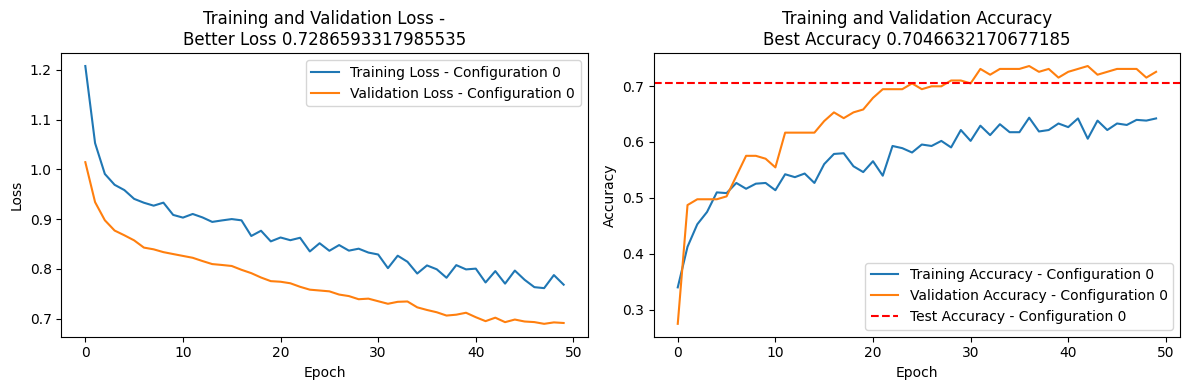

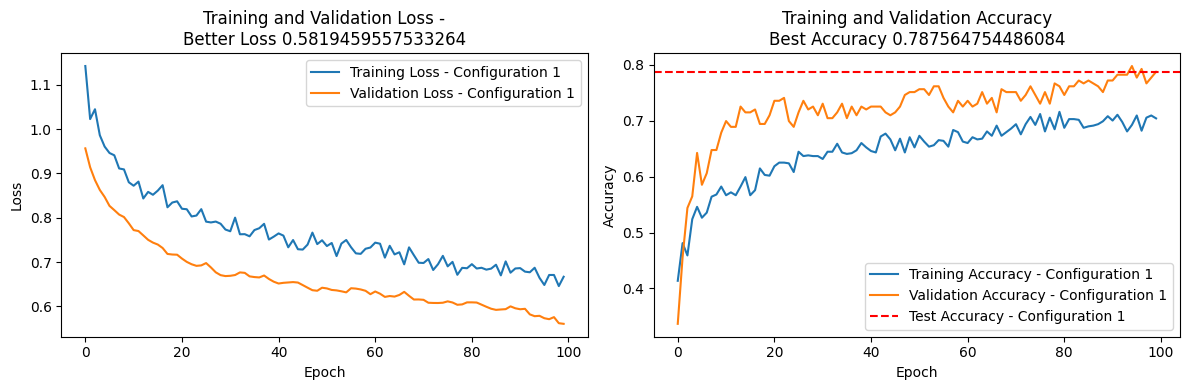

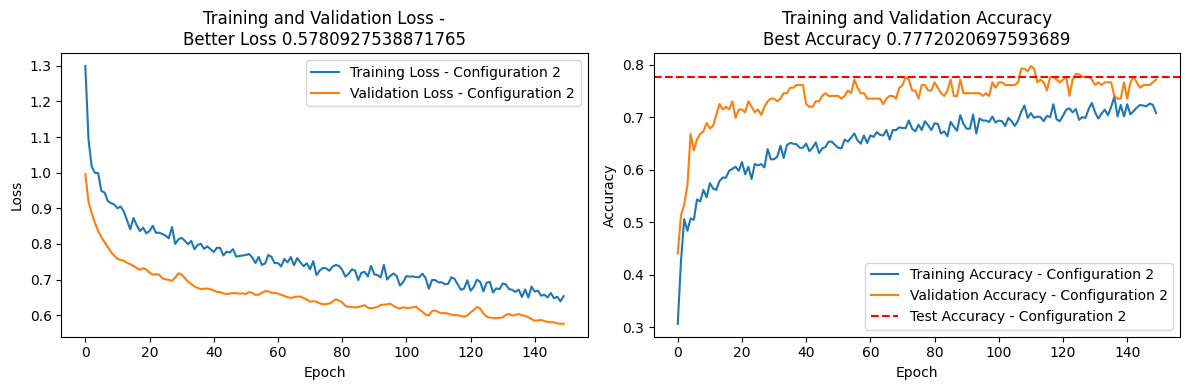

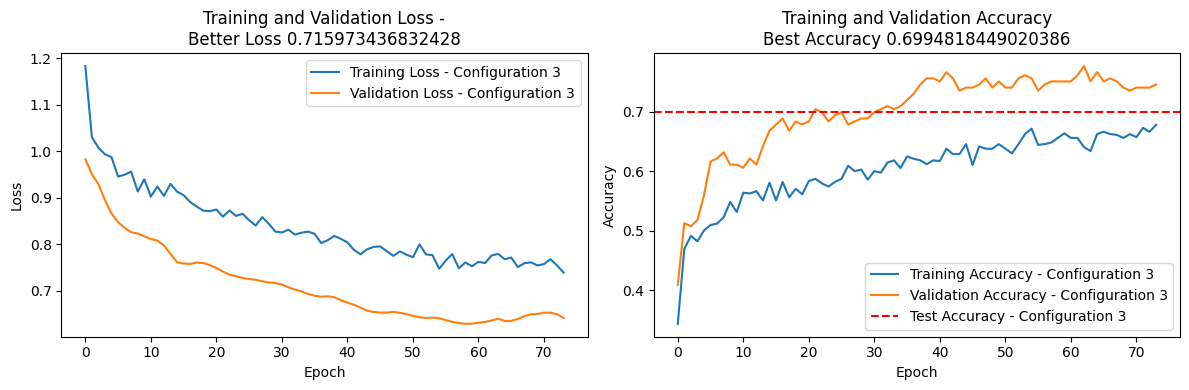

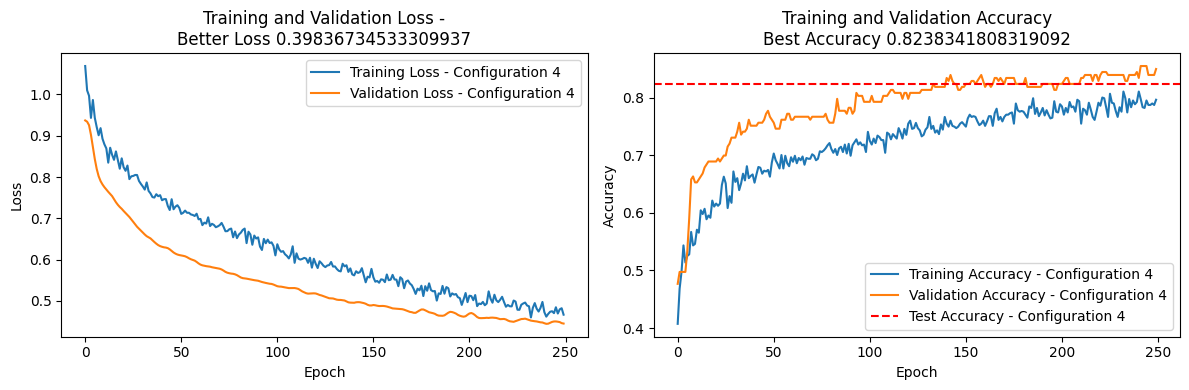

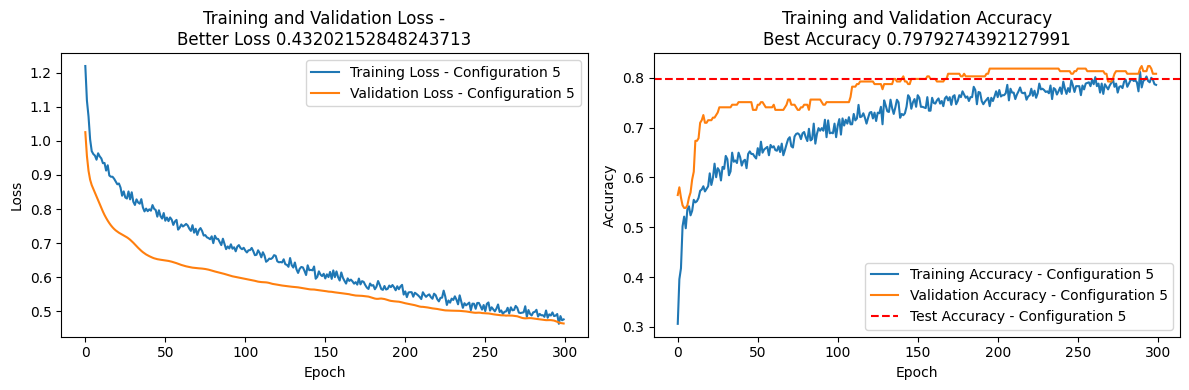

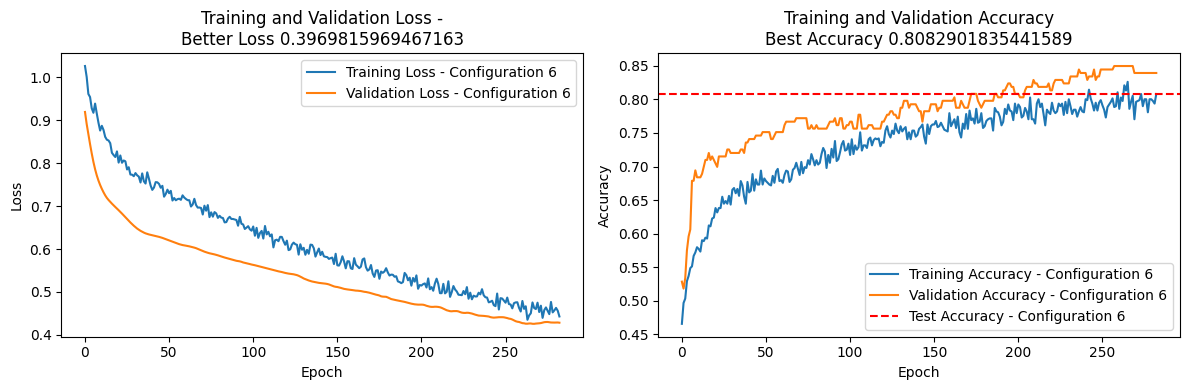

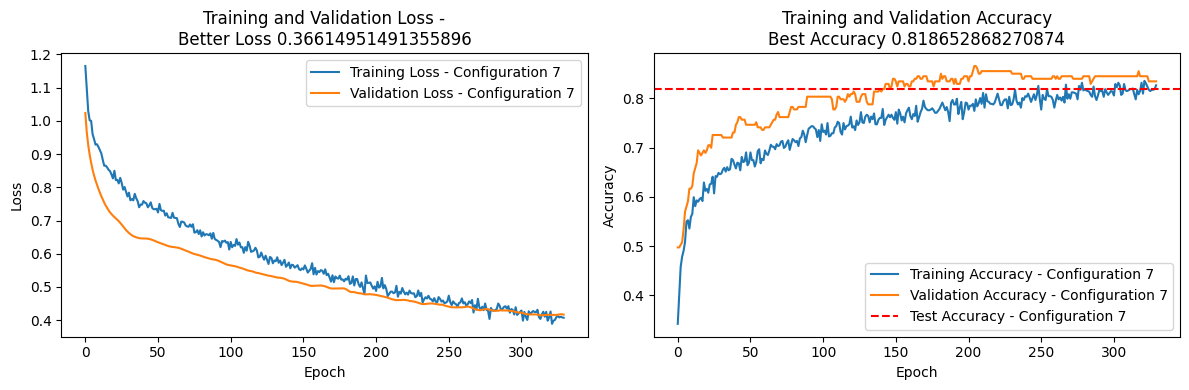

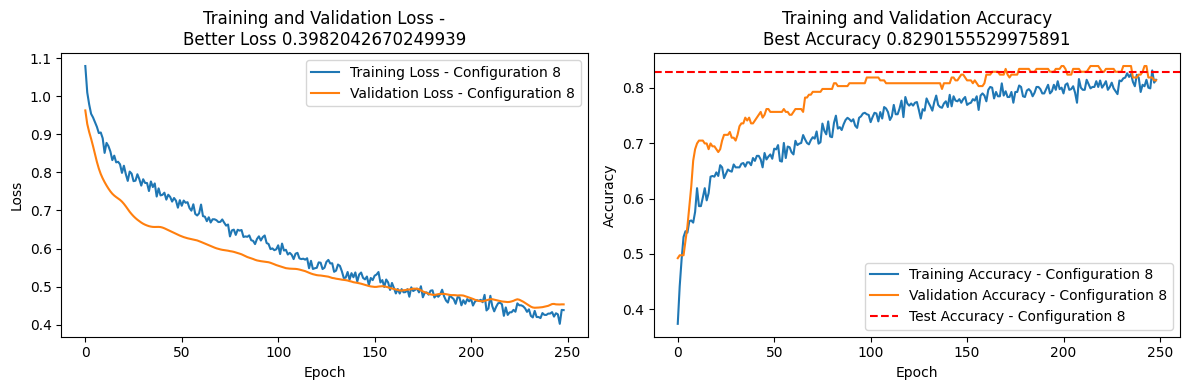

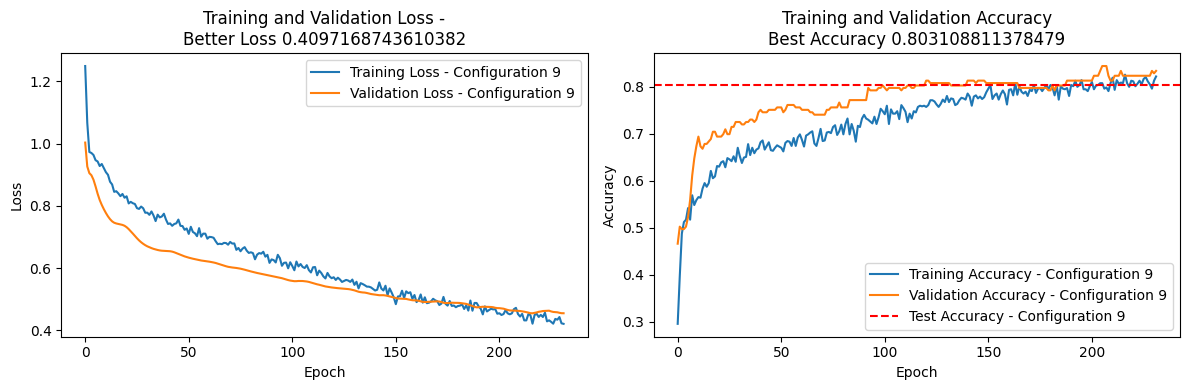

In [ ]:
i=0
for hist in list_history:
    
    print_history(hist,i,evaluation_results[i])
    i+=1

In [ ]:
evaluation_results

[[0.7286593317985535, 0.7046632170677185],
 [0.5819459557533264, 0.787564754486084],
 [0.5780927538871765, 0.7772020697593689],
 [0.715973436832428, 0.6994818449020386],
 [0.39836734533309937, 0.8238341808319092],
 [0.43202152848243713, 0.7979274392127991],
 [0.3969815969467163, 0.8082901835441589],
 [0.36614951491355896, 0.818652868270874],
 [0.3982042670249939, 0.8290155529975891],
 [0.4097168743610382, 0.803108811378479]]